In [114]:
%load_ext autoreload
%autoreload 2

import pandas as pd

from BSA import ExploratoryAnalysis


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Test Read Data File

In [18]:
expl = ExploratoryAnalysis()
expl.ReadDataFile('data/data.xlsx')

In [23]:
expl.clean_mdf_data

,EMOTIONAL,RATIONAL,LEADERSHIP,UNIQUENESS,GRATIFICATION,DISTINCTION,AMPLIFICATION,POWER,PREMIUM
0,0.008745,0.014265,0.030010,0.021613,-0.471127,-0.382125,-0.294842,4.413546,0.763057
2,0.030145,0.014265,0.030010,0.034788,-0.303403,-0.452965,-0.333698,5.546215,1.084037
3,0.030145,0.014265,0.086310,0.094500,-0.273832,0.414002,-0.543052,7.950031,1.245946
4,0.008745,0.014265,0.030010,0.034788,-0.396318,-0.396217,-0.334954,4.833347,0.926898
5,0.008745,0.014265,0.030010,0.034788,-0.573921,-0.417805,0.371342,7.824029,0.880657
...,...,...,...,...,...,...,...,...,...
23994,0.009412,0.010225,0.020702,0.021645,-0.434057,-0.531972,-0.289879,3.353580,0.922430
23996,0.019469,0.017566,0.096487,0.027432,-0.742901,0.677514,-0.344853,4.516578,1.290803
23997,0.009412,0.010225,0.020702,0.021645,-0.434057,-0.531972,-0.289879,3.353580,0.922430
23998,0.019469,0.032828,0.037734,0.027432,-0.389773,-0.320236,-0.179738,5.005224,1.218994


In [22]:
expl.image_sets.keys()

odict_keys(['All_image_grid', 'Set_2', 'Set_3', 'Set_4'])

## Test expl. functions

In [383]:
expl = ExploratoryAnalysis()
expl.ExploratoryReport("data/prostokv.xlsx")

Read File - Ok
SOE cross-correlations - Ok
SOE FAs - Ok
SOE to equity correlations - Ok


  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

Bayes nets graphs - Ok
First Order Drivers - Ok


Building tree:   0%|          | 0/210.0 [00:00<?, ?it/s]

Building tree:   0%|          | 0/210.0 [00:00<?, ?it/s]

Building tree:   0%|          | 0/210.0 [00:00<?, ?it/s]

Building tree:   0%|          | 0/210.0 [00:00<?, ?it/s]

Building tree:   0%|          | 0/210.0 [00:00<?, ?it/s]

Building tree:   0%|          | 0/210.0 [00:00<?, ?it/s]

Building tree:   0%|          | 0/210.0 [00:00<?, ?it/s]

Building tree:   0%|          | 0/210.0 [00:00<?, ?it/s]

Building tree:   0%|          | 0/210.0 [00:00<?, ?it/s]

Building tree:   0%|          | 0/210.0 [00:00<?, ?it/s]

Building tree:   0%|          | 0/210.0 [00:00<?, ?it/s]

Building tree:   0%|          | 0/210.0 [00:00<?, ?it/s]

Building tree:   0%|          | 0/210.0 [00:00<?, ?it/s]

Building tree:   0%|          | 0/210.0 [00:00<?, ?it/s]

Building tree:   0%|          | 0/210.0 [00:00<?, ?it/s]

Building tree:   0%|          | 0/210.0 [00:00<?, ?it/s]

Building tree:   0%|          | 0/210.0 [00:00<?, ?it/s]

Building tree:   0%|          | 0/210.0 [00:00<?, ?it/s]

Building tree:   0%|          | 0/210.0 [00:00<?, ?it/s]

Building tree:   0%|          | 0/210.0 [00:00<?, ?it/s]

Building tree:   0%|          | 0/210.0 [00:00<?, ?it/s]

## pls_graph

In [484]:
from GraphUtils import GraphicModel, PlotGraph

spec = pd.read_excel('data/data.xlsx', sheet_name='model_spec')

gm = GraphicModel(spec)
gm.FitPLSPM(data)

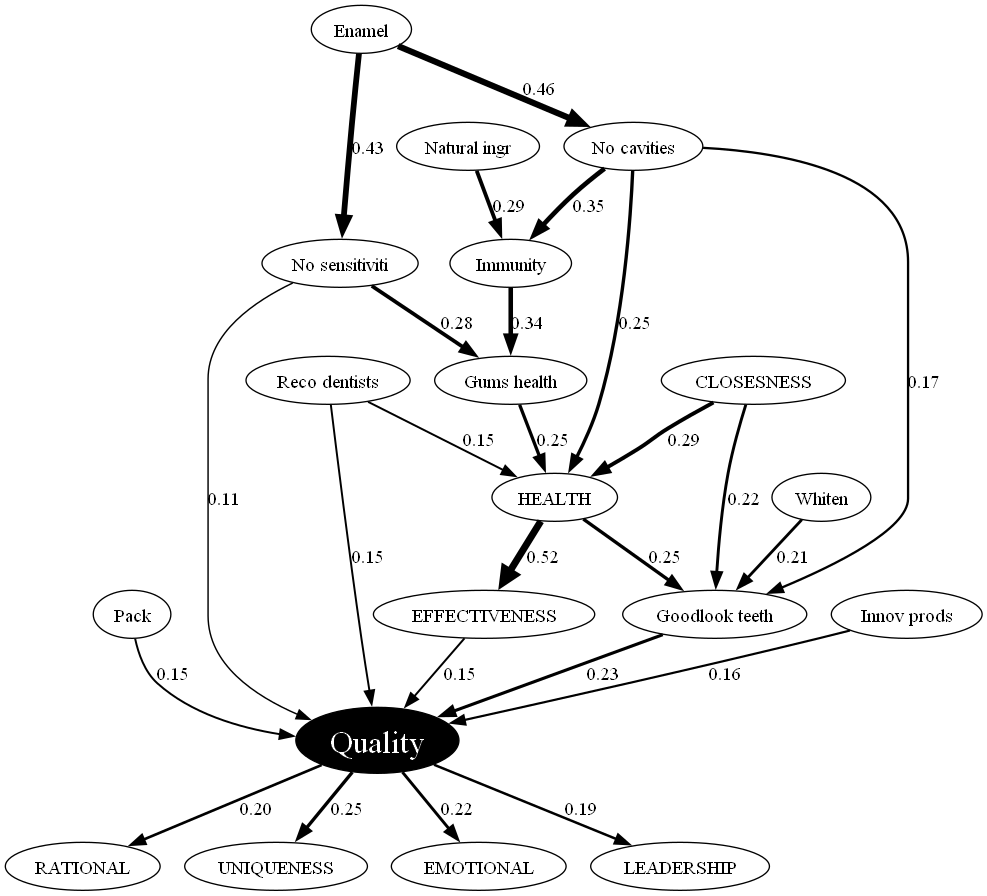

In [485]:
PlotGraph(gm.SubgraphFromNodes(['Quality']))

In [487]:
#d = gm.RoutesLenFromAllNodes(['EMOTIONAL', 'RATIONAL', 'LEADERSHIP', 'UNIQUENESS'])

d = gm.PathLenFromAllNodes(['LEADERSHIP', 'UNIQUENESS'])
#pd.DataFrame(pd.Series(d).sort_values(ascending=False)) #.to_csv('t.csv')
pd.Series(d).sort_values(ascending=False)

Quality           0.439584
Liked family      0.318341
Likeable flav     0.318201
Innov prods       0.317133
Goodlook teeth    0.275671
Reco dentists     0.254982
HEALTH            0.247542
Pack              0.216092
CLOSESNESS        0.132872
No cavities       0.117689
Modern            0.113122
Enamel            0.082539
Lots innovs       0.067777
EFFECTIVENESS     0.065273
No sensitiviti    0.064916
Gums health       0.061033
Whiten            0.058497
Immunity          0.020872
Natural ingr      0.006007
RATIONAL          0.000000
For daily use     0.000000
UNIQUENESS        0.000000
FRESH_BREATH      0.000000
EMOTIONAL         0.000000
LEADERSHIP        0.000000
dtype: float64

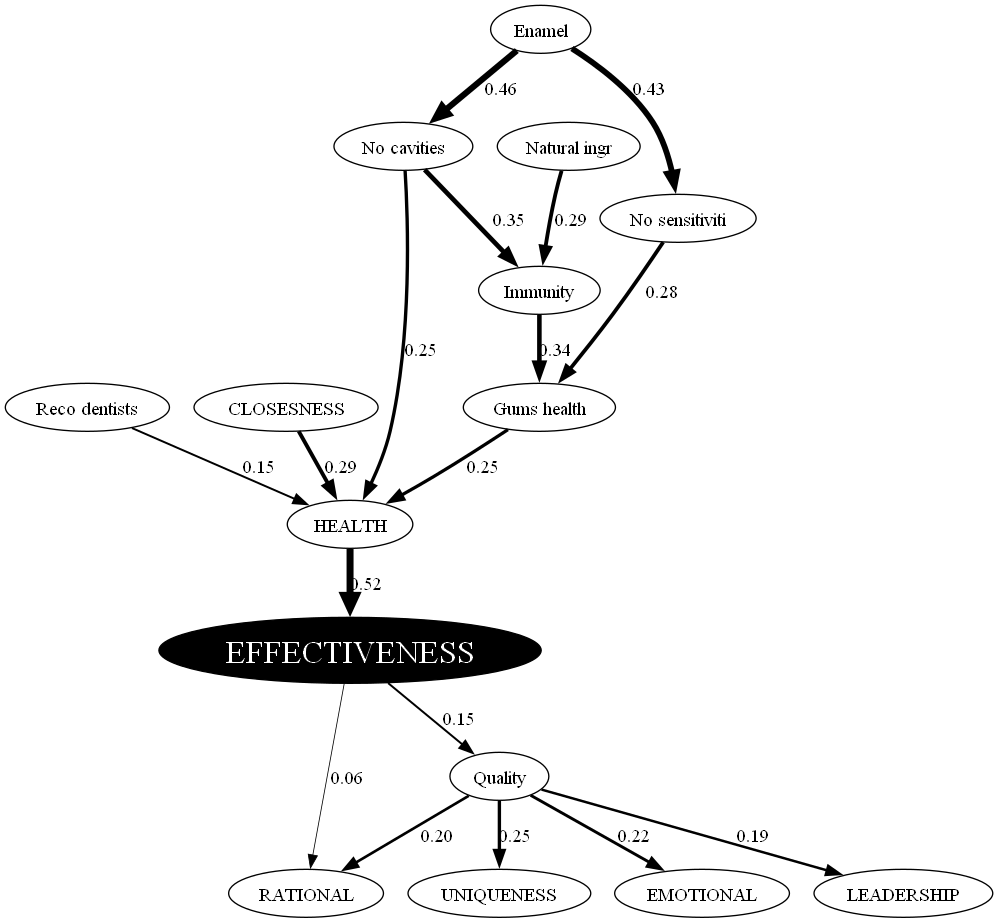

In [488]:
PlotGraph(gm.SubgraphFromNodes(['EFFECTIVENESS']))

In [489]:
gm.PathLen('EFFECTIVENESS', ['RATIONAL', 'UNIQUENESS'])

0.1272158980610587

In [490]:
gm.PathLenFromAllNodes(['RATIONAL', 'UNIQUENESS'])

Pack              0.227169
Likeable flav     0.384309
Lots innovs       0.000000
Quality           0.451240
Whiten            0.062184
Goodlook teeth    0.293046
FRESH_BREATH      0.000000
EMOTIONAL         0.000000
CLOSESNESS        0.184589
For daily use     0.000000
HEALTH            0.411121
Reco dentists     0.216582
LEADERSHIP        0.000000
UNIQUENESS        0.000000
Innov prods       0.151433
Modern            0.000000
Natural ingr      0.009976
Immunity          0.034664
EFFECTIVENESS     0.127216
RATIONAL          0.000000
No sensitiviti    0.077599
Enamel            0.110792
No cavities       0.166941
Gums health       0.101365
Liked family      0.450925
dtype: float64

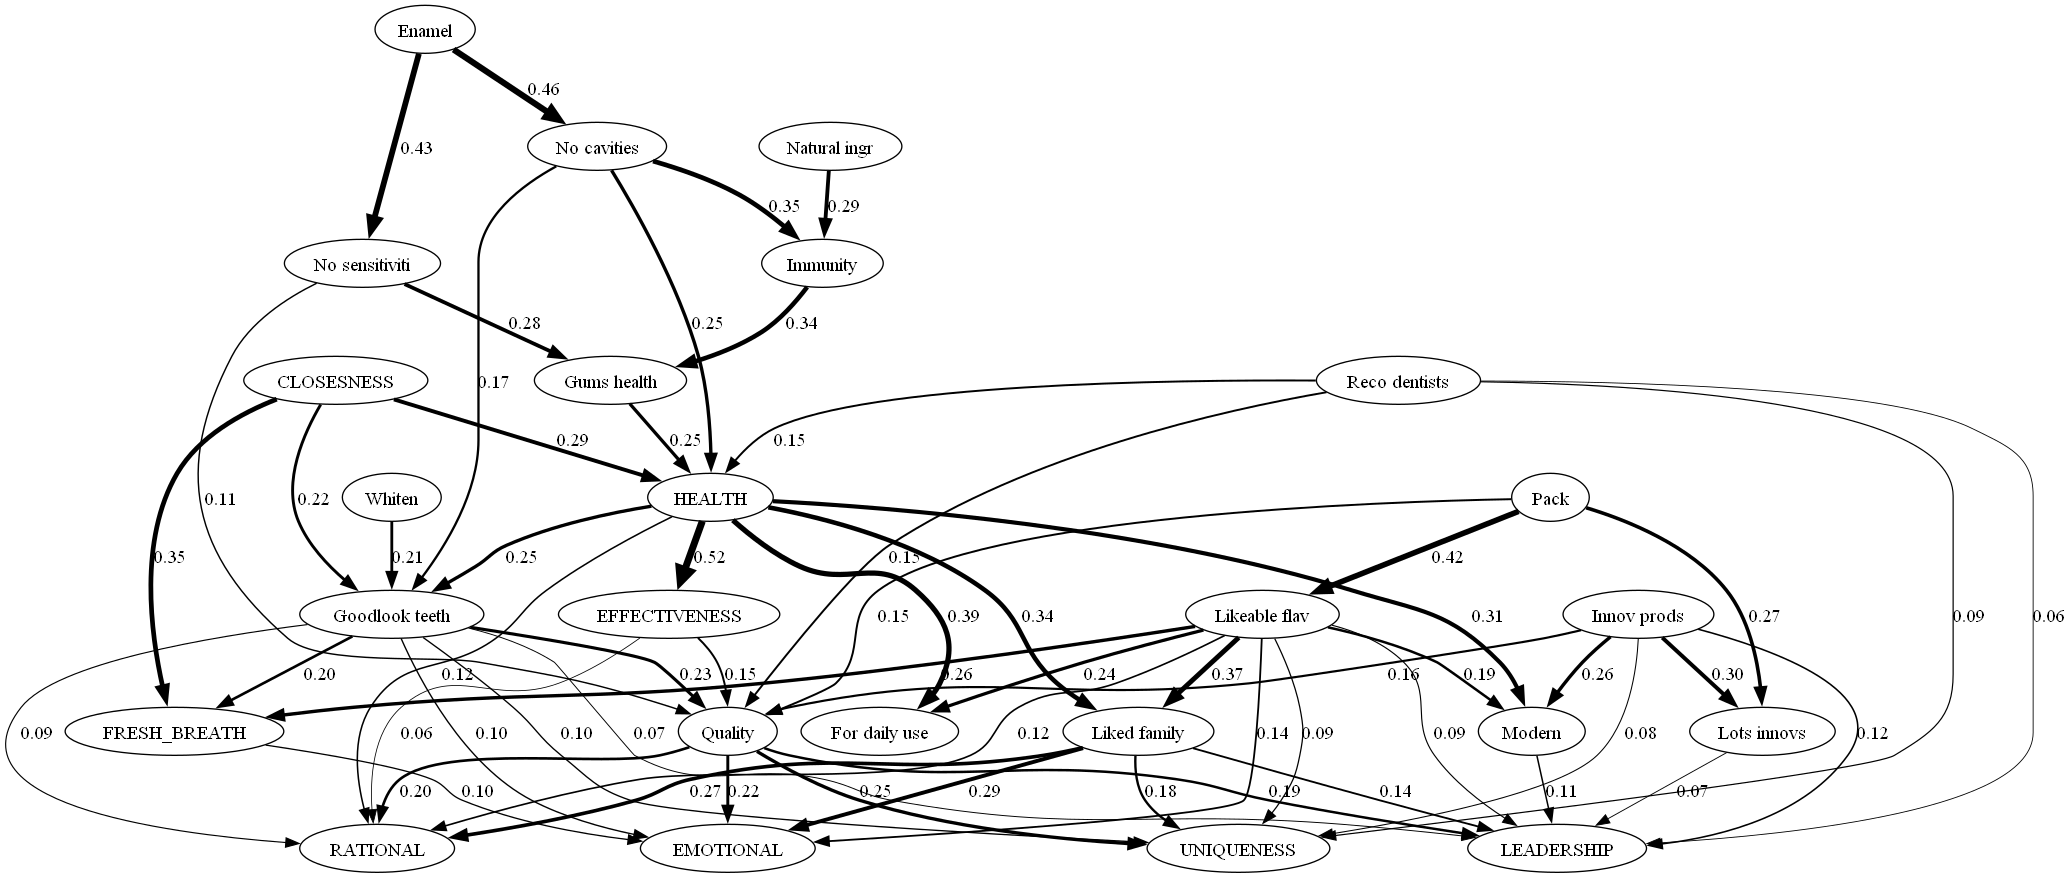

In [495]:
PlotGraph(gm.Graph(add_pls_weights=True))